# AuNR DA Figure S6

In [8]:
import sys
# add path for my packages
sys.path.append('./datasets')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import norm

%precision 3
%matplotlib inline

plt.style.use('./datasets/my_rc_setting.mplstyle')

import Lorentzian

## input data

In [9]:
glass_corr_data1 = pd.read_csv('./datasets/052323_zhenyang_corr_data.csv')
print(glass_corr_data1.shape)

glass_corr_data2 = pd.read_csv('./datasets/060123_zhenyang_corr_data.csv')
print(glass_corr_data2.shape)

glass_corr_data3 = pd.read_csv('./datasets/061523_zhenyang_corr_data.csv')
print(glass_corr_data3.shape)

glass_corr_data4 = pd.read_csv('./datasets/071023_zhenyang_corr_data.csv')
print(glass_corr_data4.shape)

glass_corr_data_combined = pd.concat([glass_corr_data1, glass_corr_data2, glass_corr_data3, glass_corr_data4], axis=0, ignore_index=True)
print(glass_corr_data_combined.shape)

glass_corr_data = pd.read_csv('./datasets/072623_zhenyang_corr_data.csv')
print(glass_corr_data.shape)

sim_data_glass = pd.read_csv('./datasets/sim_data_glass.csv')
print(sim_data_glass.shape)

(33, 15)
(16, 15)
(25, 15)
(43, 15)
(117, 15)
(129, 15)
(117, 6)


# final plot

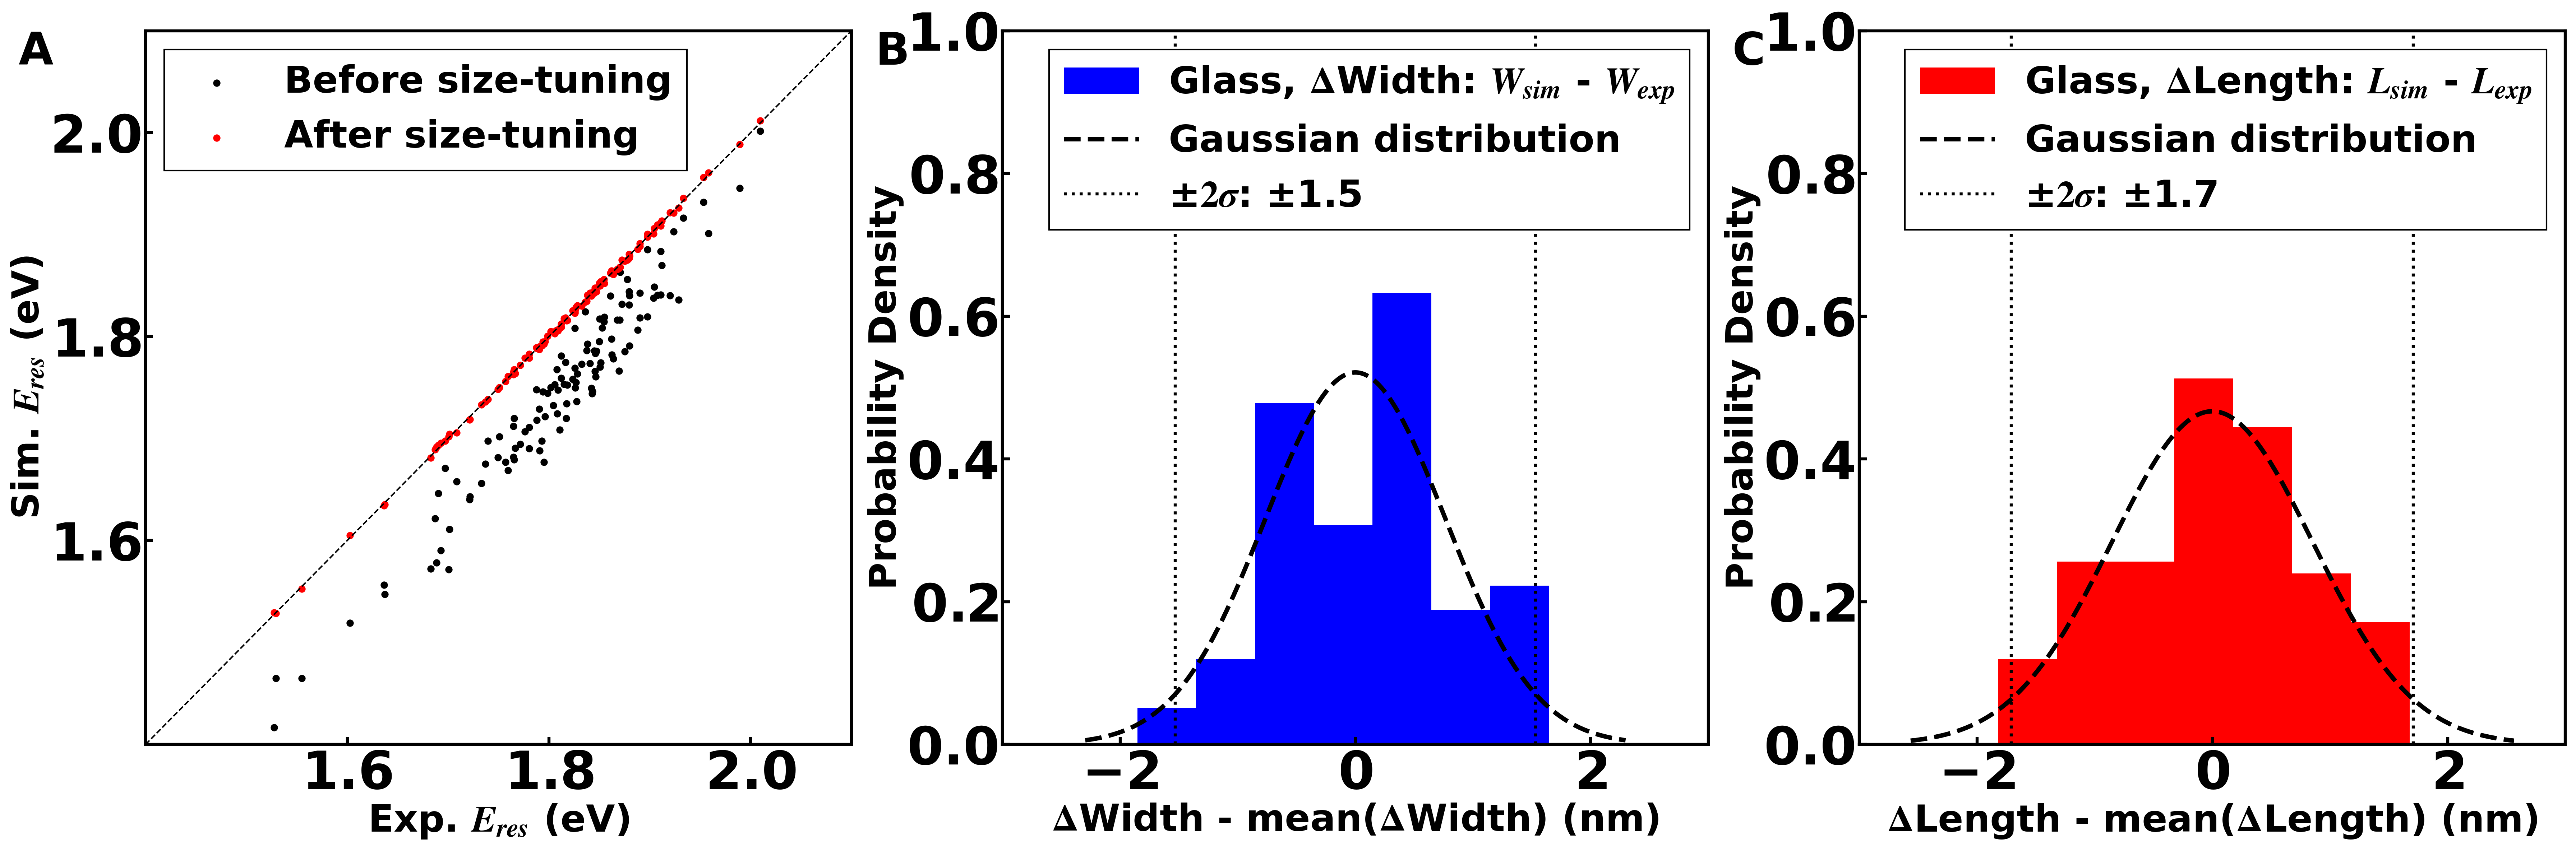

In [10]:
# Create the figure and a set of subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8), dpi=300) 

# First subplot
x = np.linspace(1.4, 2.1, 100)
ax1.plot(x, x, c='k', lw=1, ls='--')

ax1.scatter(glass_corr_data_combined['Exp_eres'], sim_data_glass['eres'], c='k', s=15, label=f'Before size-tuning')
ax1.scatter(glass_corr_data_combined['Exp_eres'], glass_corr_data_combined['Sim_eres'], c='r', s=15, label=f'After size-tuning')
ax1.set_xticks([1.6, 1.8, 2.0])
ax1.set_yticks([1.6, 1.8, 2.0])
ax1.set_xlabel('Exp. $E_{res}$ (eV)', fontsize=25)
ax1.set_ylabel('Sim. $E_{res}$ (eV)', fontsize=25)
ax1.set_xlim([1.4, 2.1])
ax1.set_ylim([1.4, 2.1])
ax1.legend(fontsize=25, loc='upper left')
ax1.text(-0.18, 1, 'A', ha='left', va='top', transform=ax1.transAxes, fontsize=30)
ax1.tick_params(axis='both', labelsize=35, pad=3)

# Second subplot
binwidth = 0.5
target1 = glass_corr_data_combined['dif_width']
target_avg1 = target1.mean()
target_std1 = target1.std()
ax2.hist(target1-target_avg1, bins=np.arange(min(target1-target_avg1), max(target1-target_avg1)+binwidth, binwidth), color='blue', label='Glass, $\Delta$Width: $W_{sim}$ - $W_{exp}$', density=True)
x = np.linspace(-3 * target_std1, 3 * target_std1, 1000)
y = norm.pdf(x, 0, target_std1)
ax2.plot(x, y, 'k--', label='Gaussian distribution')

ax2.axvline(x=-2 * target_std1, color='k', linestyle='dotted', linewidth=2, label=f'±$2\sigma$: ±{round(2*target_std1, 1)}')
ax2.axvline(x=2 * target_std1, color='k', linestyle='dotted', linewidth=2)
ax2.set_xlabel('$\Delta$Width - mean($\Delta$Width) (nm)', fontsize=25)
ax2.set_ylabel('Probability Density', fontsize=25)
ax2.set_ylim(0, 1.0)
ax2.set_xlim(-3, 3)
ax2.legend(fontsize=25)
ax2.text(-0.18, 1, 'B', ha='left', va='top', transform=ax2.transAxes, fontsize=30)
ax2.tick_params(axis='both', labelsize=35, pad=3)

# Third subplot
binwidth = 0.5
target2 = glass_corr_data_combined['dif_length']
target_avg2 = target2.mean()
target_std2 = target2.std()
ax3.hist(target2-target_avg2, bins=np.arange(min(target2-target_avg2), max(target2-target_avg2)+binwidth, binwidth), color='red', label='Glass, $\Delta$Length: $L_{sim}$ - $L_{exp}$', density=True)
# Overlay Gaussian curve
x = np.linspace(-3 * target_std2, 3 * target_std2, 1000)
y = norm.pdf(x, 0, target_std2)
ax3.plot(x, y, 'k--', label='Gaussian distribution')

ax3.axvline(x=-2 * target_std2, color='k', linestyle='dotted', linewidth=2, label=f'±$2\sigma$: ±{round(2*target_std2, 1)}')
ax3.axvline(x=2 * target_std2, color='k', linestyle='dotted', linewidth=2)

ax3.set_xlabel('$\Delta$Length - mean($\Delta$Length) (nm)', fontsize=25)
ax3.set_ylabel('Probability Density', fontsize=25)
ax3.set_ylim(0, 1.0)
ax3.set_xlim(-3, 3)
ax3.legend(fontsize=25)
ax3.text(-0.18, 1, 'C', ha='left', va='top', transform=ax3.transAxes, fontsize=30)
ax3.tick_params(axis='both', labelsize=35, pad=3)

# Save the figure
# plt.savefig("AuNR_DA_figureS6.png", dpi=300, bbox_inches='tight')

## nomality test

In [11]:
stat1, p_value1 = shapiro(target1 - target_avg1)
print(f'Statistic: {stat1}, p-value: {p_value1}')

stat2, p_value2 = shapiro(target2 - target_avg2)
print(f'Statistic: {stat2}, p-value: {p_value2}')

Statistic: 0.981344997882843, p-value: 0.1036200150847435
Statistic: 0.9815678000450134, p-value: 0.10854431986808777
